# UCI Semicon Dataset
> https://archive.ics.uci.edu/ml/datasets/SECOM

- 반도체 제조 공정의 데이터
    - –1은 합격에 해당하고 1은 불합격에 해당
    - 데이터 타임 스탬프는 해당 특정 시험 지점을 의미
    
    

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

 * uci-secom.csv 파일을 읽어서 DataFrame 'data'를 생성하세요

In [2]:
# df = pd.read_csv('uci-secom.csv') 
# data = pd.DataFrame(df)
# data
data = pd.read_csv('uci-secom.csv') 
data
#Pass/Fail 범주형임을 알 수 있음

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2008-10-16 15:13:00,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,...,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1563,2008-10-16 20:49:00,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,...,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1564,2008-10-17 05:26:00,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,...,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1565,2008-10-17 06:01:00,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,...,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1


### 결측치 처리

* 열 별 na 개수를 출력하세요

In [3]:
data.isna().sum()

Time          0
0             6
1             7
2            14
3            14
             ..
586           1
587           1
588           1
589           1
Pass/Fail     0
Length: 592, dtype: int64

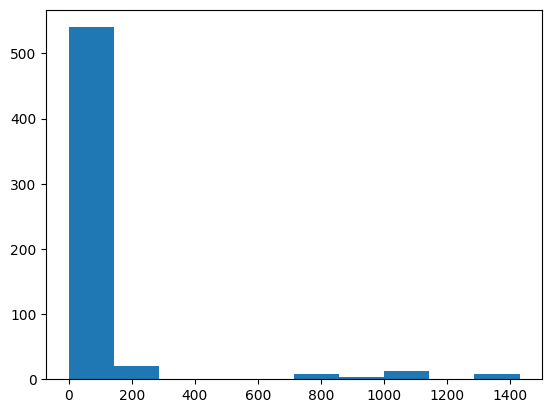

In [4]:
plt.hist(data.isna().sum())
plt.show()

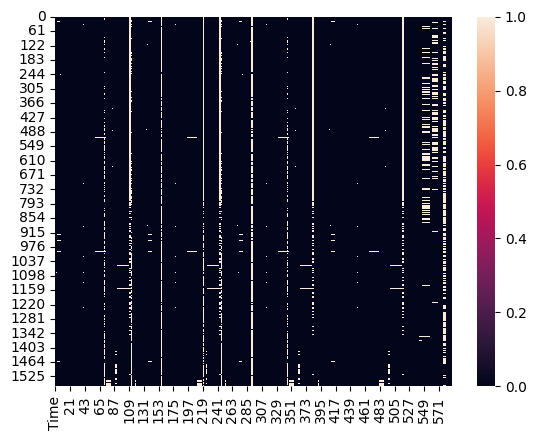

In [5]:
sns.heatmap(data.isna())
plt.show()

In [6]:
data.isna().sum().describe()

count     592.000000
mean       70.863176
std       241.476304
min         0.000000
25%         2.000000
50%         6.000000
75%         9.000000
max      1429.000000
dtype: float64

* 전체 na 개수를 출력하세요

In [7]:
data.isna().sum().sum()

41951

* 데이터프레임 'data'의 정보를 출력하세요

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


* na를 0으로 채운 후 전체 na 개수를 출력하세요

In [16]:
# 선형 보간법으로 결측치 채우기
# data = data.interpolate(method='linear', axis=0)


data = data.interpolate(method='linear', axis=0)
data = data.fillna(method='ffill').fillna(method='bfill')

In [17]:
data.isna().sum().sum()

0

In [18]:
# data = data.fillna(0)
# #원본에 반영
# #data.fillna(0, inplace=True)
# data.isna().sum().sum()

### 추가 데이터 처리

* 'Pass/Fail' 열의 각 값 (-1, 1)의 개수를 출력하세요 (Series 의 value_counts() 함수 활용)




In [19]:
# data['Pass/Fail'].value_counts(normalize=True)
data['Pass/Fail'].value_counts()

-1    1463
 1     104
Name: Pass/Fail, dtype: int64

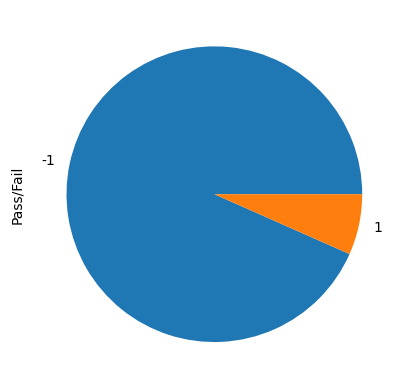

In [20]:
data['Pass/Fail'].value_counts(normalize=True).plot(kind='pie')
plt.show()

* 불필요한 'Time' 열을 삭제한 후 크기(Shape)를 조회하세요

In [21]:
data = data.drop('Time',axis=1)
data.shape

(1567, 591)

In [22]:
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 500)

### ML

In [23]:
data.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,0.0,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,3.0490,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,117.5132,61.29,4.515,70.0,352.7173,10.1841,130.3691,723.3092,1.3072,141.2282,1.0,624.3145,218.3174,0.0,4.592,4.841,2834.0,0.9317,0.9484,4.7057,-1.7264,350.9264,10.6231,108.6427,16.1445,21.7264,29.5367,693.7724,0.9226,148.6009,1.0,608.1700,84.0793,140.6972,485.2665,0.0,0.0126,-0.0206,0.0141,-0.0307,-0.0083,-0.0026,-0.0567,-0.0044,7.2163,0.1320,0.1107,2.3895,0.9690,1747.6049,0.1841,8671.9301,-0.3274,-0.0055,-0.0001,0.0001,0.0003,-0.2786,0.0,0.3974,-0.0251,0.0002,0.0002,0.1350,-0.0042,0.0003,0.0056,0.0000,-0.2468,0.3196,0.9768,105.7455,230.7648,0.4684,0.9460,0.0,748.6115,0.9908,58.4306,0.6002,0.9804,6.3788,15.88,2.639,15.94,15.93,0.8656,3.353,0.4098,3.188,-0.0473,0.7243,0.9960,2.2967,1000.7263,39.2373,123.0,111.3,75.2,46.2000,350.6710,0.3948,0.0,6.78,0.0034,0.0898,0.0850,0.0358,0.0328,12.2566,0.0,4.271,10.284,0.4734,0.0167,11.8901,0.41,0.0506,0.1584,995.6006,1017.0,967.0,1066.0,368.0,0.090,0.048,0.095,2.0,0.9,0.069,0.046,0.7250,0.1139,0.3183,0.5888,0.3184,0.9499,0.3979,0.160,0.0,0.0,20.95,0.333,12.49,16.713,0.0803,5.72,0.0,11.19,65.363,0.0,0.0,0.0,0.0,0.0,0.0,0.292,5.38,20.10,0.296,10.62,10.30,5.38,4.040,16.230,0.2951,8.64,0.0,10.30,97.314,0.0,0.0772,0.0599,0.0700,0.0547,0.0704,0.0520,0.0301,0.1135,3.4789,0.0010,0.0065,0.0707,0.0211,175.2173,0.0315,1940.3994,0.0,0.0744,0.0546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0027,0.0040,0.0,0.0,0.0,0.0,0.0042,0.6877,3.7395,0.1729,0.0188,0.0,...,2.8551,0.0,2.9971,31.8843,13.5664,15.4488,0.0,0.0215,0.0274,0.0315,0.0238,0.0206,0.0238,0.0144,0.0491,1.2708,0.0004,0.002,0.0229,0.0065,55.2039,0.0105,560.2658,0.0,0.0170,0.0148,0.0124,0.0114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0010,0.0013,0.0,0.0,0.0,0.0,0.0013,0.2278,1.4496,0.0221,0.0055,0.0,61.5932,0.0003,0.9967,0.0082,0.0017,0.1437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0151,14.2396,1.43

* 학습을 위해 x와 y를 추출하세요
* y는 'Pass/Fail' 열이고, x는 'Pass/Fail'을 제외한 나머지 열입니다.

In [24]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

#2차원 데이터를 1차원으로 변경
#y1 = y.values.flatten()

# print('y1 shape : ', y1.shape)
print("shape of x:", x.shape)
print("shape of y:", y.shape)


shape of x: (1567, 590)
shape of y: (1567,)


* Standard Scaling (표준화)를 적용하세요

In [25]:
from sklearn.preprocessing import StandardScaler

x_scaled = StandardScaler().fit_transform(x)


* x 데이터를 train과 test로 분할하세요
* 비율은 8:2로 지정합니다. (test_size = 0.2)
* 층화 추출을 설정하세요 (stratify=y)

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(x_scaled, y ,test_size = 0.2,
                                                     random_state=0, stratify=y )

print("shape of x_train:", X_train.shape)
print("shape of x_test:", X_test.shape)
print("shape of y_train:", y_train.shape)
print("shape of y_test:", y_test.shape)

shape of x_train: (1253, 590)
shape of x_test: (314, 590)
shape of y_train: (1253,)
shape of y_test: (314,)


* 로지스틱 회귀 알고리즘을 적용하고 score를 출력하세요
* max_iter=1000

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lg = LogisticRegression(max_iter=1000).fit(X_train,y_train)

print('train : {:.3f}, test : {:.3f}' .format(lg.score(X_train,y_train),
                                              lg.score(X_test,y_test)))


train : 0.995, test : 0.885


* 학습된 모델을 이용하여 x_test 데이터에 결과를 예측하고 출력하세요

In [28]:
y_pred = lg.predict(X_test)

print("y_pred",y_pred)

y_pred [-1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  1 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1  1
 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1
 -1 -1]


* 예측 결과의 각 값 (-1, 1)의 개수를 출력하세요

In [29]:
#np.array 같은 경우 먼저 pandas 의 자료구조인 Series로 변경해주는 작업이 필요

y_list = pd.Series(y_pred)
y_list.value_counts()

-1    295
 1     19
dtype: int64

In [30]:
y_list.value_counts()
#pd.Series(y_pred).value_counts()

-1    295
 1     19
dtype: int64

* 정답의 각 값 (-1, 1)의 개수를 출력하세요

In [31]:
y_test

726    -1
167     1
319    -1
1249   -1
203    -1
569    -1
824    -1
1459   -1
1302    1
1237   -1
970    -1
1241    1
1328    1
1347   -1
322    -1
985    -1
620    -1
1431   -1
108    -1
665    -1
740    -1
624    -1
588    -1
346    -1
251    -1
571    -1
1100   -1
1393   -1
795     1
559    -1
1286   -1
124    -1
382    -1
893    -1
712    -1
1113   -1
958    -1
984    -1
849    -1
170    -1
1418   -1
1053   -1
358    -1
965    -1
1174   -1
1479   -1
395    -1
1236   -1
1504   -1
1194   -1
627    -1
1055   -1
612    -1
444    -1
129    -1
1138   -1
1413   -1
621    -1
507    -1
376    -1
1145   -1
862    -1
850    -1
1188   -1
1049   -1
875    -1
1433   -1
518     1
1502   -1
1227    1
23      1
246    -1
39     -1
836    -1
1542   -1
175    -1
1217   -1
300    -1
318    -1
193    -1
763    -1
230    -1
83     -1
1255   -1
1028   -1
1031   -1
54     -1
173    -1
149    -1
339    -1
876    -1
1372   -1
1524   -1
705    -1
853    -1
600    -1
961    -1
1121   -1
241     1
1515   -1


In [32]:
y_test.value_counts()

-1    293
 1     21
Name: Pass/Fail, dtype: int64

* KNN 알고리즘을 적용하고 score를 출력하세요
* k=3

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=3).fit(X_train,y_train)

print('train : {:.3f}, test : {:.3f}' .format(knc.score(X_train,y_train), 
                                              knc.score(X_test,y_test)))


train : 0.947, test : 0.914


* Decision Tree 알고리즘을 적용하고 score를 출력하세요
* random_state=0
* max_depth는 자동, 3으로 각각 수행하세요

In [34]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0).fit(X_train,y_train)

print('train : {:.3f}, test : {:.3f}' .format(dtc.score(X_train,y_train), dtc.score(X_test,y_test)))

train : 1.000, test : 0.860


In [35]:
dtc3 = DecisionTreeClassifier(max_depth=3,random_state=0).fit(X_train,y_train)

print('train : {:.3f}, test : {:.3f}' .format(dtc3.score(X_train,y_train), dtc3.score(X_test,y_test)))

train : 0.948, test : 0.908


* Random Forest 알고리즘을 적용하고 score를 출력하세요
* random_state=0

In [36]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier().fit(X_train,y_train)
print('train : {:.3f}, test : {:.3f}' .format(rfc.score(X_train,y_train), rfc.score(X_test,y_test)))

train : 1.000, test : 0.933


* Gradient Boosting 알고리즘을 적용하고 score를 출력하세요
* random_state=0

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=0).fit(X_train,y_train)

print('train : {:.3f}, test : {:.3f}' .format(gbc.score(X_train,y_train), gbc.score(X_test,y_test)))

train : 0.982, test : 0.924


In [32]:
### GridSearchCV를 적용하여 GradientBoosting의 최적의 파라미터, 최적의 estimator를 구해 보세요


## 파라미터 값은 n_estimators, max_depth, learning_rate을 활용해 보세요
# 시간이 너무 오래 걸릴 경우 아래와 같이 단순한 파라미터 사용
#{'n_estimators':[10,20], 'max_depth':[5,10], 'learning_rate':[0.01, 0.1]}

from sklearn.model_selection import GridSearchCV

params = { 'n_estimators':[10,20], 'max_depth':[5,10], 'learning_rate':[0.01, 0.1]}
gridS = GridSearchCV(gbc, params).fit(X_train, y_train)

gridS.best_params_

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 10}

In [38]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=0, learning_rate=0.01,max_depth= 5,n_estimators= 10).fit(X_train,y_train)

print('train : {:.3f}, test : {:.3f}' .format(gbc.score(X_train,y_train), gbc.score(X_test,y_test)))

train : 0.934, test : 0.933


In [39]:
## xgboost -1값 +로 수정
y_train = y_train.replace(-1,0)
y_test = y_test.replace(-1,0)

In [40]:
## 추가적으로 xgbm과 lightgbm도 본인이 값이 설정해서 수행해 보세요


#xgbm
from xgboost import XGBClassifier

xgbc = XGBClassifier(n_estimators=200, learning_rate=0.01, max_depth=3).fit(X_train,y_train)

print('train : {:.3f}, test : {:.3f}' .format(xgbc.score(X_train,y_train), 
                                              xgbc.score(X_test,y_test)))


train : 0.937, test : 0.933


In [41]:
xgbc = XGBClassifier(n_estimators=200, learning_rate=0.5, max_depth=3).fit(X_train,y_train)

print('train : {:.3f}, test : {:.3f}' .format(xgbc.score(X_train,y_train), 
                                              xgbc.score(X_test,y_test)))


train : 1.000, test : 0.939


In [42]:
#lightgbm
from lightgbm import LGBMClassifier


lgbc = LGBMClassifier(n_estimators=200, learning_rate=0.03, max_depth=3).fit(X_train,y_train)

print('train : {:.3f}, test : {:.3f}' .format(lgbc.score(X_train,y_train), lgbc.score(X_test,y_test)))

[LightGBM] [Info] Number of positive: 83, number of negative: 1170
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003788 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105262
[LightGBM] [Info] Number of data points in the train set: 1253, number of used features: 464
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.066241 -> initscore=-2.645918
[LightGBM] [Info] Start training from score -2.645918
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [41]:
### GridSearchCV를 적용하여 GradientBoosting의 최적의 파라미터, 최적의 estimator를 구해 보세요


## 파라미터 값은 n_estimators, max_depth, learning_rate을 활용해 보세요
# 시간이 너무 오래 걸릴 경우 아래와 같이 단순한 파라미터 사용
#{'n_estimators':[10,20], 'max_depth':[5,10], 'learning_rate':[0.01, 0.1]}

from sklearn.model_selection import GridSearchCV

params = { 'n_estimators':[10,20], 'max_depth':[5,10], 'learning_rate':[0.01, 0.1]}
gridS = GridSearchCV(xgbc, params).fit(X_train, y_train)

gridS.best_params_

{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 10}

In [43]:
xgbc = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=10).fit(X_train,y_train)

print('train : {:.3f}, test : {:.3f}' .format(xgbc.score(X_train,y_train), 
                                              xgbc.score(X_test,y_test)))


train : 1.000, test : 0.939
